In [82]:
import numpy as np
import data_reader as dr
import matplotlib.pyplot as plt
import toolkit as tk
# from scipy.optimize import fsolve
from scipy.optimize import curve_fit

%matplotlib inline

In [2]:
samp = dr.sample(r"C:\Users\Scott Reid\Documents\Masters\Research\Data\In_Situ_3-09-18")
samp.add_bridge('geo1', 138.9, 115.8, 2.4)
samp.add_bridge('geo2', 138.9, 101, 2.4)
samp.add_bridge('geo3', 138.9, 76.6, 2.4)
samp.add_bridge('geo4', 138.9, 59.1, 2.4) #Widening in middle with 76.6 micron width
samp.add_bridge('geo5', 138.9, 59.4, 2.4)
samp.add_bridge('geo6', 138.9, 44.5, 2.4)
samp.add_bridge('geo7', 138.9, 34.5, 2.4)
samp.add_bridge('geo8', 138.9, 34.5, 2.4) #Legthened bar on both sides of contacts
samp.add_bridge('geo9', 138.9, 24.6, 2.4)
samp.add_bridge('geo10', 138.9, 19, 2.4)
samp.add_bridge('geo11', 138.9, 15, 2.4)
samp.add_bridge('geo12', 138.9, 11, 2.4)
samp.add_bridge('geo13', 138.9, 8.9, 2.4)
samp.add_bridge('geo14', 138.9, 7.3, 2.4)
samp.add_bridge('geo15', 138.9, 6.4, 2.4)

In [3]:
measurements = {0 : 'geo1', 1 : 'geo1', 2 : 'geo1', 3 : 'geo1', 4 : 'geo1', 5 : 'geo1', 
                6 : 'geo1', 7 : 'geo1', 8 : 'geo1', 9 : 'geo1', 10 : 'geo1', 
                11 : 'geo1', 12 : 'geo2', 13 : 'geo2', 14 : 'geo2', 15 : 'geo2', 
                16 : 'geo2', 17 : 'geo3', 18 : 'geo3', 19 : 'geo3', 20 : 'geo4',
                21 : 'geo4', 22 : 'geo5', 23 : 'geo5', 24 : 'geo6', 25: 'geo6',
                26 : 'geo6', 27: 'geo7', 28: 'geo7', 29: 'geo7', 30: 'geo8',
                31 : 'geo9', 32 : 'geo10', 33 : 'geo11', 34 : 'geo12', 35 : 'geo13',
                36 : 'geo14', 37 : 'geo14', 38 : 'geo15', 39 : 'geo15', 40 : 'geo15',
                41 : 'geo15'}

In [393]:
sliding_list = [7, 8, 12, 13, 17, 18, 21, 22, 23, 24, 25, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
clean_slist = [7, 8, 12, 13, 17, 21, 22, 24, 29, 30, 31, 32, 33, 34, 35, 36]

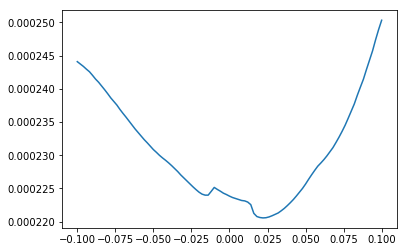

In [3]:
dat, nam = samp.get_dat(3)
plt.plot(dat['IOff'], dat['R'])

# Resistivity vs. Sample Width

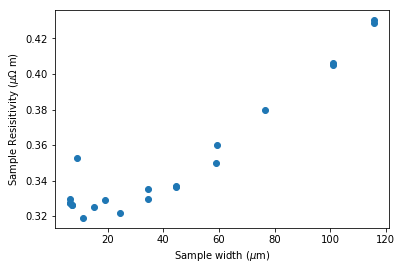

In [105]:
width = []
rtivity = []
for i in sliding_list:
    dat, nam = samp.get_dat(i)
    geo = measurements[i]
    b = samp.b(geo)
    l = samp.bl(geo)
    w = samp.bw(geo)
    
    r = tk.resistivity(dat['R'], np.sqrt(2) * dat['IA'], b)
    
    if (dat['IOff'][0] == 0):
        width.append(w)
        rtivity.append(r[0])
plt.plot(width,rtivity, 'o')
plt.xlabel(r'Sample width ($\mu$m)')
plt.ylabel('Sample Resisitivity ($\mu\Omega$ m)')

# Finding Threshold Field

### Definition 1: Peak in Derivative

In [394]:
def derivative(x, y):
    return (x[1:] + x[:-1])/2.0, (y[1:] - y[:-1])/(x[1:] - x[:-1])

In [395]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

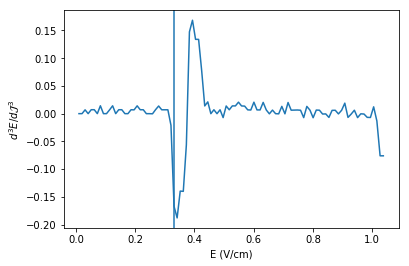

In [435]:
j = clean_slist[4]
dat, nam = samp.get_dat(j)
r = tk.resistivity(dat['R'], np.sqrt(2) * dat['IA'], b)
e = tk.E_field(dat['IOff'], np.sqrt(2)*dat['IA'], dat['R'], l)
x = e
y = r
xx, yy = derivative(x,y)
yy = smooth(yy, 5)
xxx, yyy = derivative(xx, yy)
std = np.std(yyy)
et = np.min(xxx[yyy < -std])
plt.plot(xxx,yyy)
plt.axvline(et)
plt.xlabel('E (V/cm)')
plt.ylabel(r'$d^3 E/d\mathcal{J}^3$')

C:\Users\Scott Reid\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


([<matplotlib.axis.XTick at 0x1aa812da6a0>,
 <a list of 5 Text xticklabel objects>)

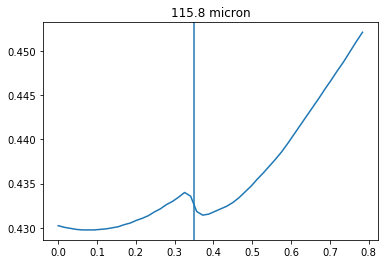

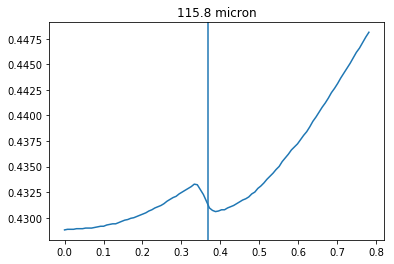

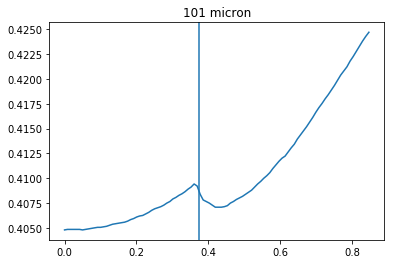

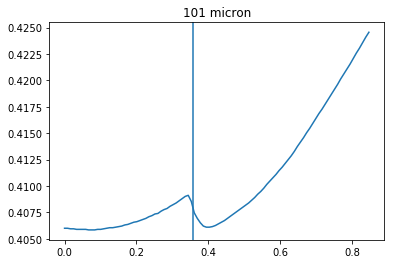

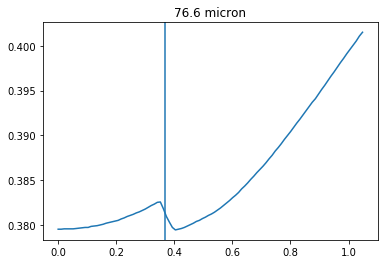

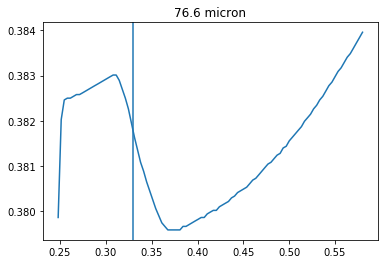

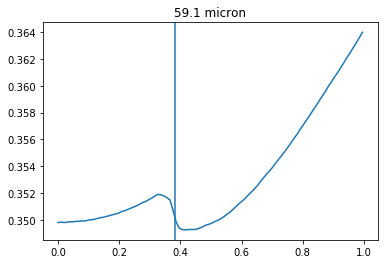

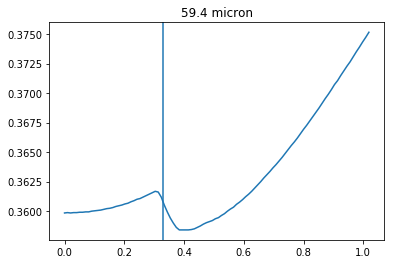

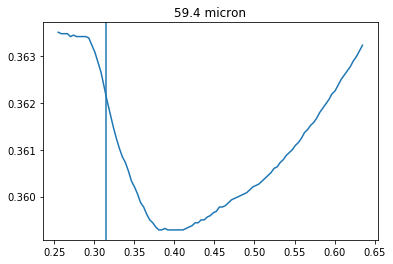

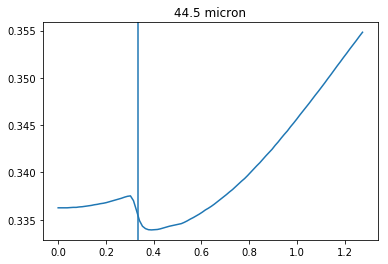

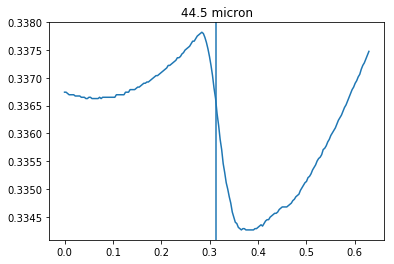

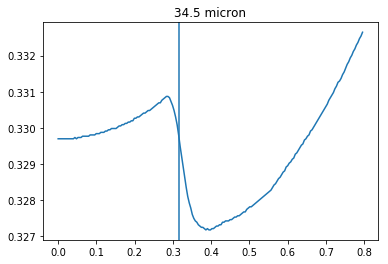

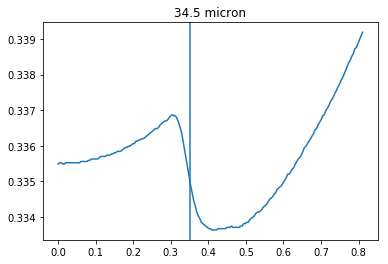

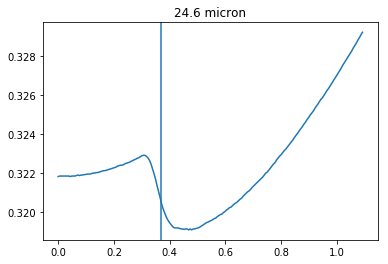

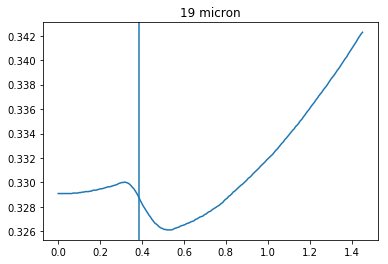

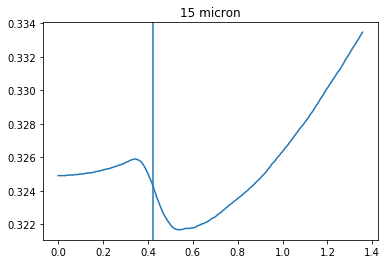

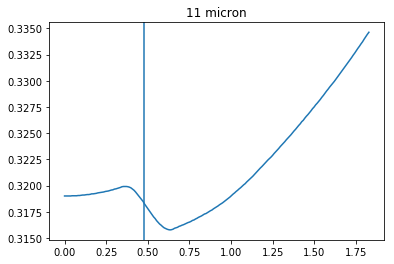

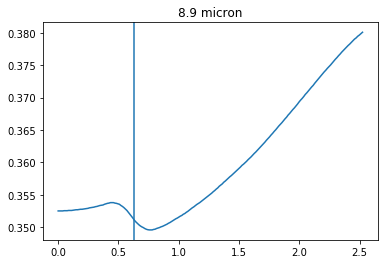

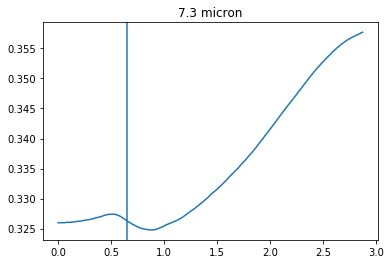

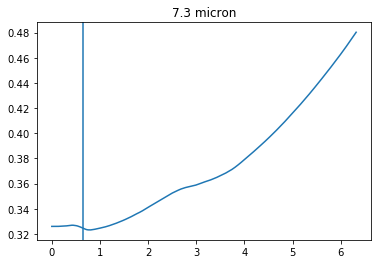

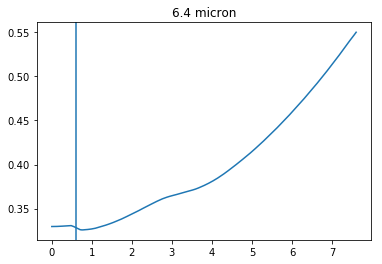

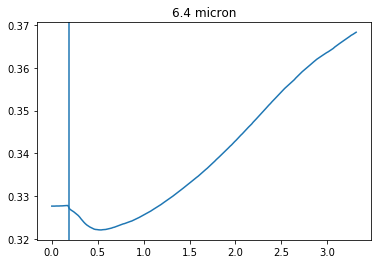

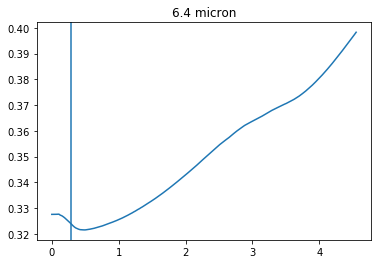

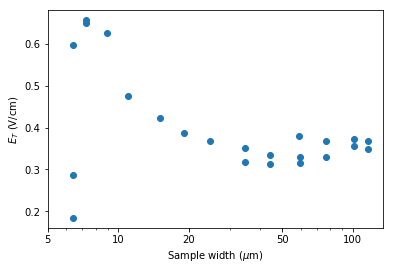

In [424]:
width = []
Et = []
for i in sliding_list:
    dat, nam = samp.get_dat(i)
    geo = measurements[i]
    b = samp.b(geo)
    l = samp.bl(geo)
    w = samp.bw(geo)
    
    r = tk.resistivity(dat['R'], np.sqrt(2) * dat['IA'], b)
    e = tk.E_field(dat['IOff'], np.sqrt(2)*dat['IA'], dat['R'], l)
    
    ee, rr = derivative(e, r)
    et = ee[np.argmin(rr)]
    
    width.append(w)
    Et.append(et)
    
    plt.figure()
    plt.plot(e, r)
    plt.axvline(et)
    plt.title(str(w) + ' micron')
plt.figure()
plt.plot(width,Et, 'o')
plt.xlabel(r'Sample width ($\mu$m)')
plt.ylabel('$E_T$ (V/cm)')
plt.xscale('log')
plt.xticks([5, 10, 20, 50, 100], [5, 10, 20, 50, 100])


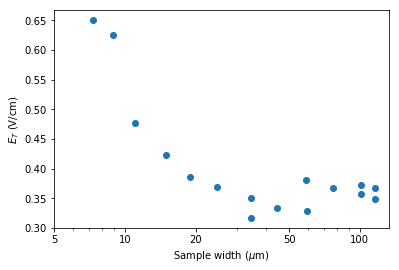

In [422]:
width = []
Et = []
for i in clean_slist:
    dat, nam = samp.get_dat(i)
    geo = measurements[i]
    b = samp.b(geo)
    l = samp.bl(geo)
    w = samp.bw(geo)
    
    r = tk.resistivity(dat['R'], np.sqrt(2) * dat['IA'], b)
    e = tk.E_field(dat['IOff'], np.sqrt(2)*dat['IA'], dat['R'], l)
    
    ee, rr = derivative(e, r)
    et = ee[np.argmin(rr)]
    
    width.append(w)
    Et.append(et)
    
#     plt.figure()
#     plt.plot(e, r)
#     plt.axvline(et)
plt.figure()
plt.plot(width,Et, 'o')
plt.xlabel(r'Sample width ($\mu$m)')
plt.ylabel('$E_T$ (V/cm)')
plt.xscale('log')
plt.xticks([5, 10, 20, 50, 100], [5, 10, 20, 50, 100])


width1, Et1 = np.array(width), np.array(Et)

### Definition 2: derivative below 0

C:\Users\Scott Reid\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


([<matplotlib.axis.XTick at 0x1aafbc939e8>,
 <a list of 5 Text xticklabel objects>)

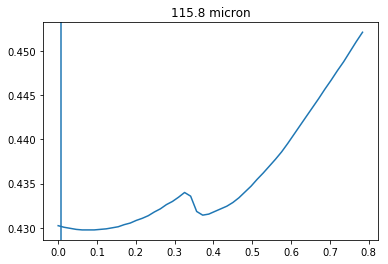

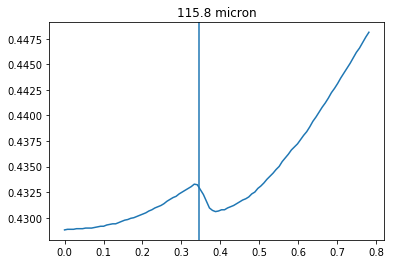

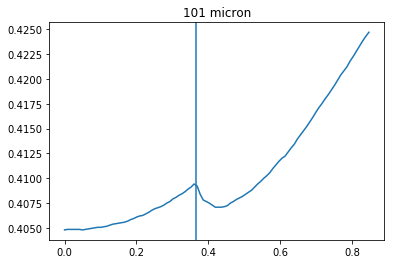

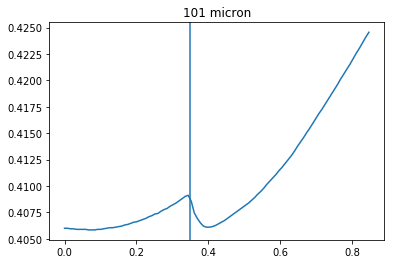

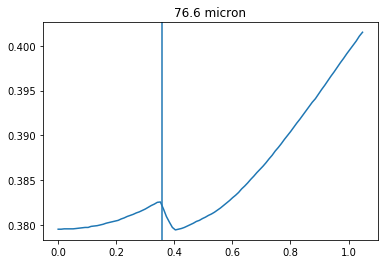

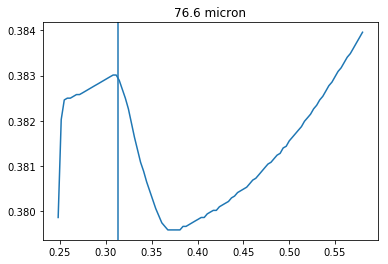

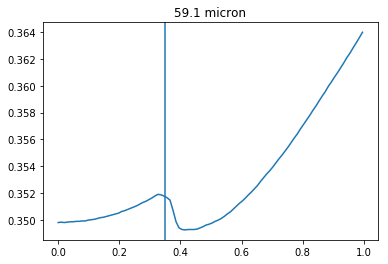

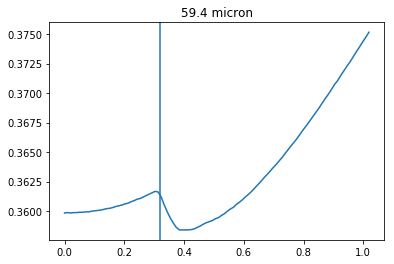

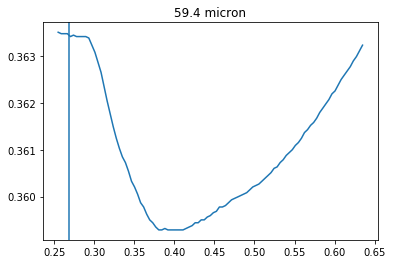

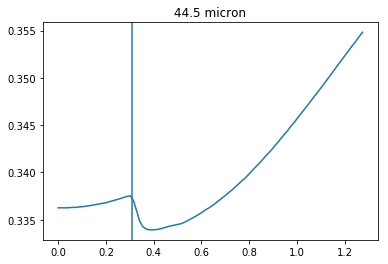

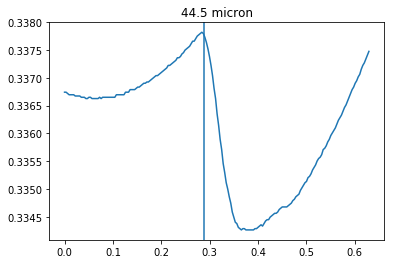

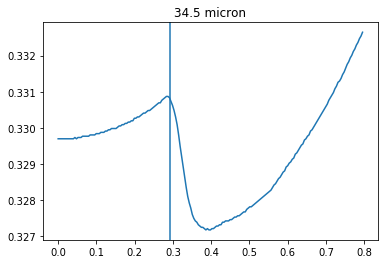

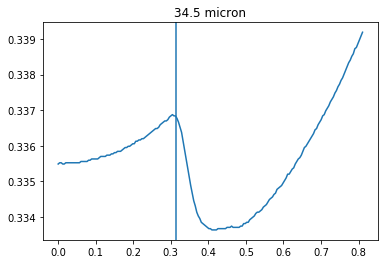

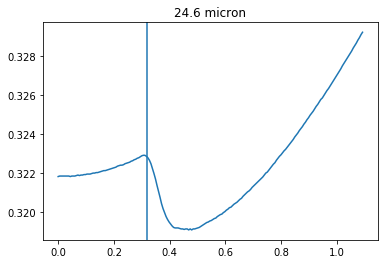

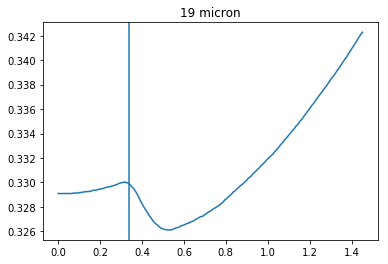

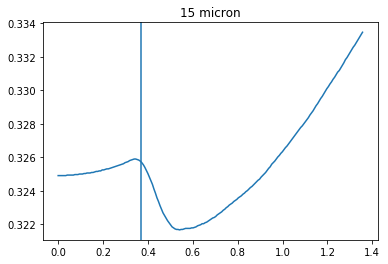

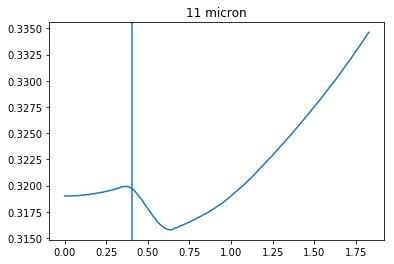

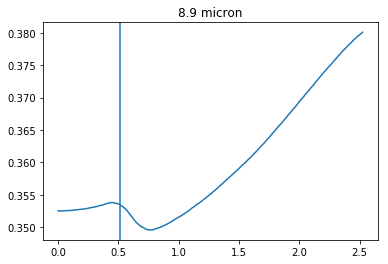

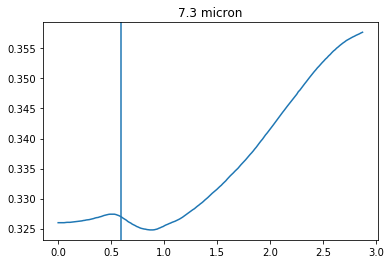

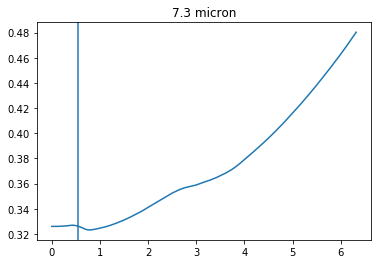

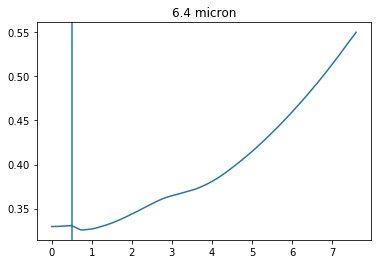

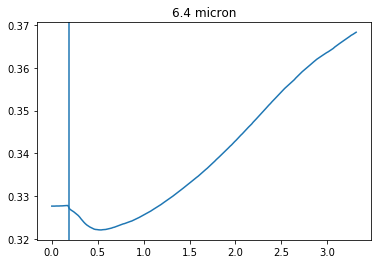

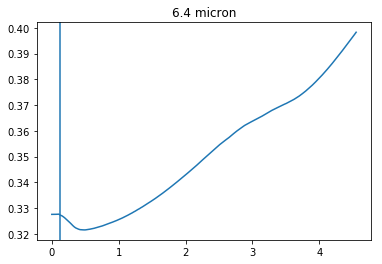

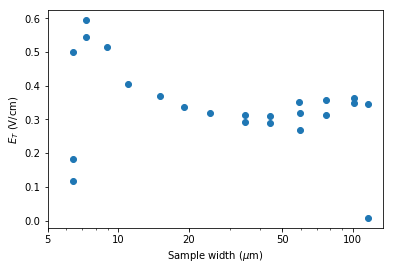

In [423]:
width = []
Et = []
for i in sliding_list:
    dat, nam = samp.get_dat(i)
    geo = measurements[i]
    b = samp.b(geo)
    l = samp.bl(geo)
    w = samp.bw(geo)
    
    r = tk.resistivity(dat['R'], np.sqrt(2) * dat['IA'], b)
    e = tk.E_field(dat['IOff'], np.sqrt(2)*dat['IA'], dat['R'], l)
    
    ee, rr = derivative(e, r)
    et = np.min(ee[rr < -0.01])
    
    width.append(w)
    Et.append(et)
    
    plt.figure()
    plt.plot(e, r)
    plt.axvline(et)
    plt.title(str(w) + ' micron')
plt.figure()
plt.plot(width,Et, 'o')
plt.xlabel(r'Sample width ($\mu$m)')
plt.ylabel('$E_T$ (V/cm)')
plt.xscale('log')
plt.xticks([5, 10, 20, 50, 100], [5, 10, 20, 50, 100])


([<matplotlib.axis.XTick at 0x1aaffeaacf8>,
 <a list of 5 Text xticklabel objects>)

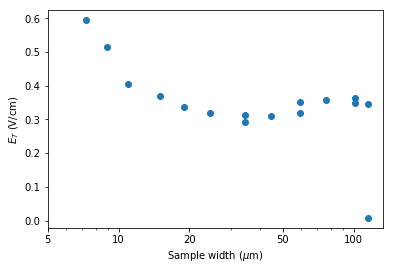

In [425]:
width = []
Et = []
for i in clean_slist:
    dat, nam = samp.get_dat(i)
    geo = measurements[i]
    b = samp.b(geo)
    l = samp.bl(geo)
    w = samp.bw(geo)
    
    r = tk.resistivity(dat['R'], np.sqrt(2) * dat['IA'], b)
    e = tk.E_field(dat['IOff'], np.sqrt(2)*dat['IA'], dat['R'], l)
    
    ee, rr = derivative(e, r)
    et = np.min(ee[rr < -0.01])
    
    width.append(w)
    Et.append(et)
    
#     plt.figure()
#     plt.plot(e, r)
#     plt.axvline(et)
#     plt.title(str(w) + ' micron')
plt.figure()
plt.plot(width,Et, 'o')
plt.xlabel(r'Sample width ($\mu$m)')
plt.ylabel('$E_T$ (V/cm)')
plt.xscale('log')

width2, Et2 = np.array(width), np.array(Et)
plt.xticks([5, 10, 20, 50, 100], [5, 10, 20, 50, 100])


# Defition 3: Second derivative less than standard deviation

C:\Users\Scott Reid\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


([<matplotlib.axis.XTick at 0x1aa81c52fd0>,
 <a list of 5 Text xticklabel objects>)

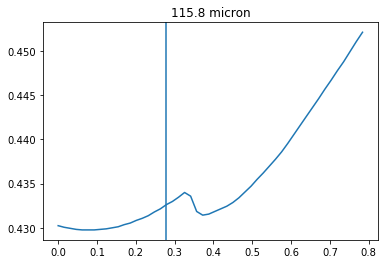

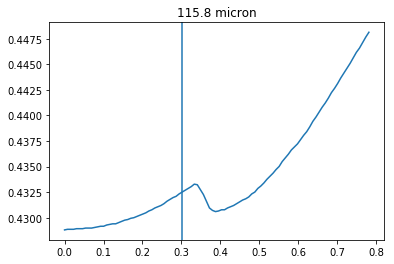

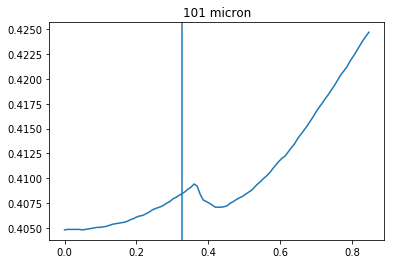

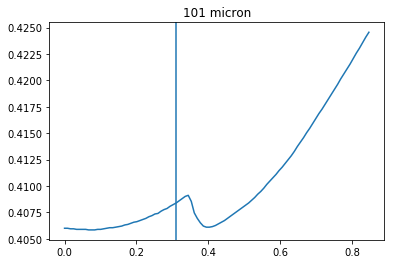

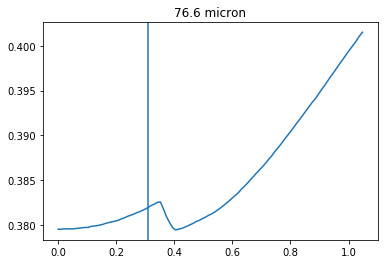

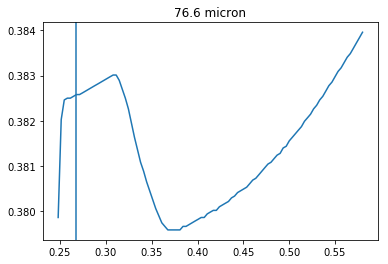

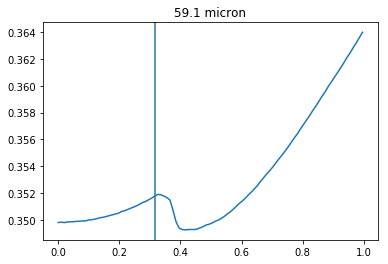

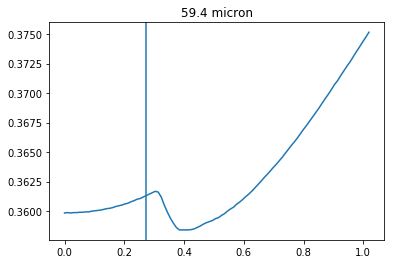

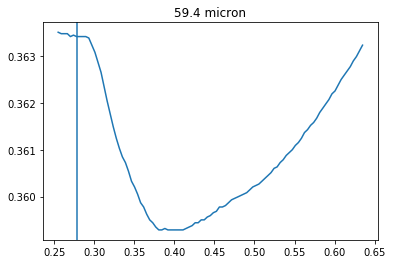

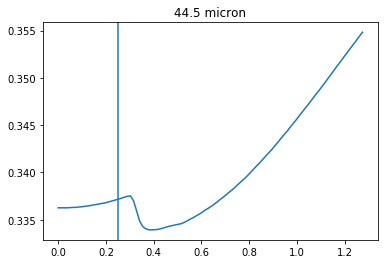

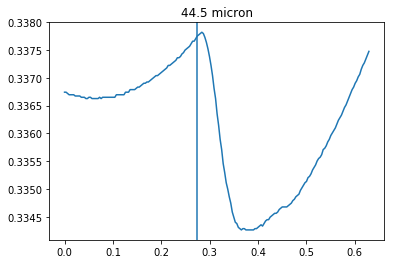

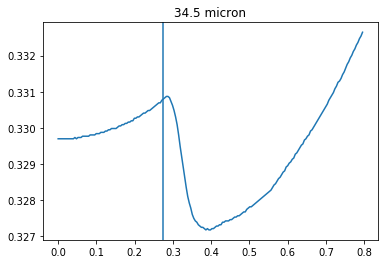

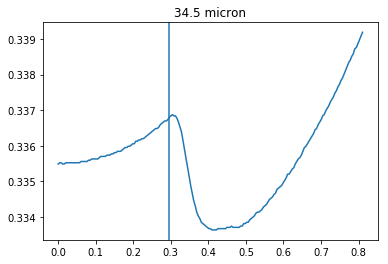

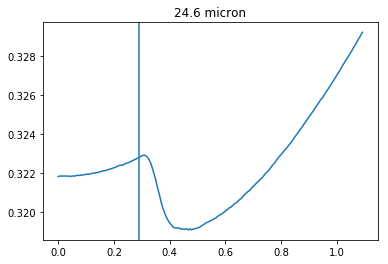

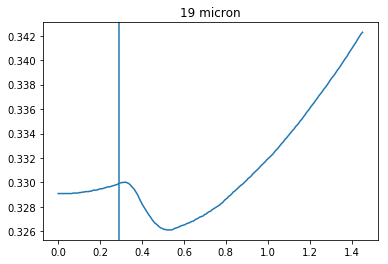

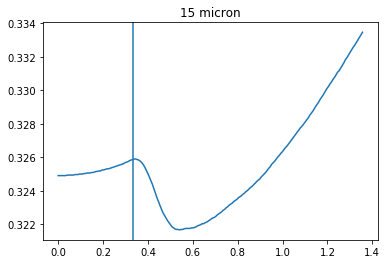

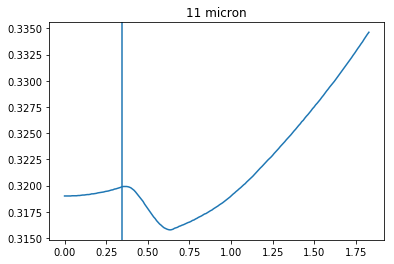

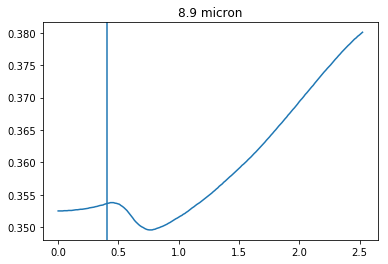

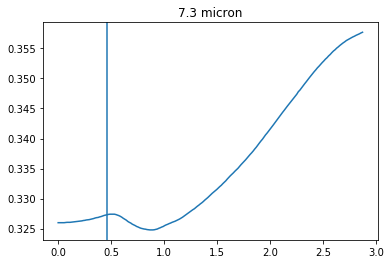

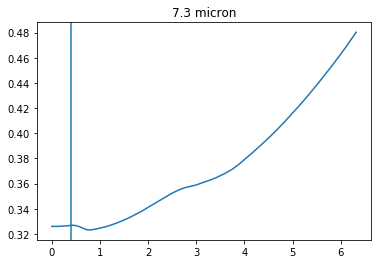

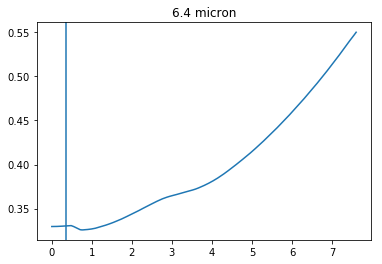

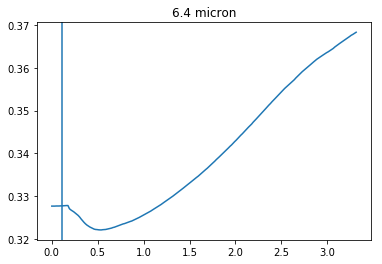

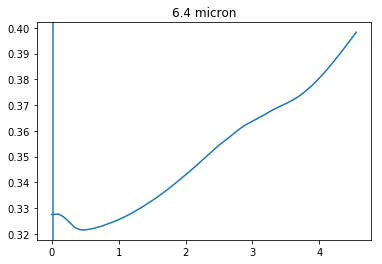

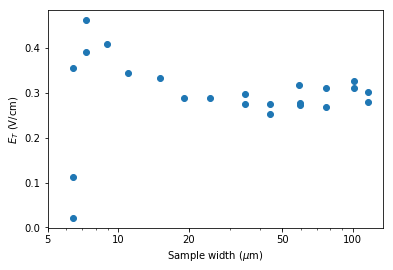

In [426]:
width = []
Et = []
for i in sliding_list:
    dat, nam = samp.get_dat(i)
    geo = measurements[i]
    b = samp.b(geo)
    l = samp.bl(geo)
    w = samp.bw(geo)
    
    r = tk.resistivity(dat['R'], np.sqrt(2) * dat['IA'], b)
    e = tk.E_field(dat['IOff'], np.sqrt(2)*dat['IA'], dat['R'], l) 
    ee, rr = derivative(e, r)
    rr = smooth(rr, 10)
    eee, rrr = derivative(ee, rr)
    std = np.std(rrr)
    et = np.min(eee[rrr < -std])

    plt.figure()
    plt.plot(e,r)
    plt.axvline(et)
    plt.title(str(w) + ' micron')
    
    width.append(w)
    Et.append(et)
plt.figure()
plt.plot(width,Et, 'o')
plt.xlabel(r'Sample width ($\mu$m)')
plt.ylabel('$E_T$ (V/cm)')
plt.xscale('log')
plt.xticks([5, 10, 20, 50, 100], [5, 10, 20, 50, 100])


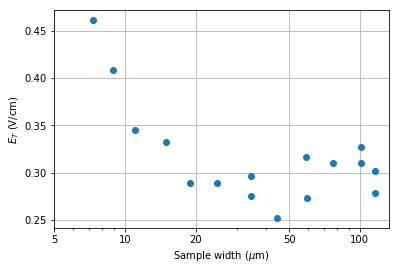

In [430]:
width = []
Et = []
for i in clean_slist:
    dat, nam = samp.get_dat(i)
    geo = measurements[i]
    b = samp.b(geo)
    l = samp.bl(geo)
    w = samp.bw(geo)
    
    r = tk.resistivity(dat['R'], np.sqrt(2) * dat['IA'], b)
    e = tk.E_field(dat['IOff'], np.sqrt(2)*dat['IA'], dat['R'], l) 
    ee, rr = derivative(e, r)
    rr = smooth(rr, 10)
    eee, rrr = derivative(ee, rr)
    std = np.std(rrr)
    et = np.min(eee[rrr < -std])

#     plt.figure()
#     plt.plot(e,r)
#     plt.axvline(et)
#     plt.title(str(w) + ' micron')
    
    width.append(w)
    Et.append(et)
plt.figure()
plt.plot(width,Et, 'o')
plt.xlabel(r'Sample width ($\mu$m)')
plt.ylabel('$E_T$ (V/cm)')
plt.xscale('log')

width3, Et3 = np.array(width), np.array(Et)
plt.xticks([5, 10, 20, 50, 100], [5, 10, 20, 50, 100])
plt.grid(True)

([<matplotlib.axis.XTick at 0x1aa83381fd0>,
 <a list of 5 Text xticklabel objects>)

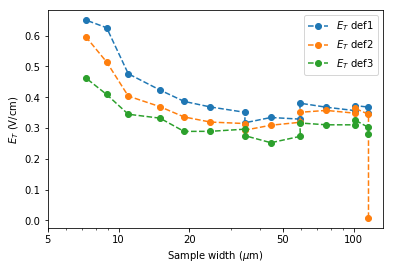

In [429]:
plt.plot(width1, Et1, "o--", label = r'$E_T$ def1')
plt.plot(width2, Et2, "o--", label = r'$E_T$ def2')
plt.plot(width3, Et3, "o--", label = r'$E_T$ def3')
plt.xlabel(r'Sample width ($\mu$m)')
plt.xscale('log')
plt.ylabel(r"$E_T$ (V/cm)")
plt.legend()
plt.xticks([5, 10, 20, 50, 100], [5, 10, 20, 50, 100])


# Sliding vs. E/Et

### 1) dE/dJ

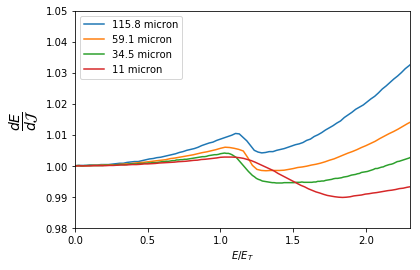

In [405]:
width = []
Et = []
j = 0
for i in clean_slist:
    dat, nam = samp.get_dat(i)
    geo = measurements[i]
    b = samp.b(geo)
    l = samp.bl(geo)
    w = samp.bw(geo)
    
    r = tk.resistivity(dat['R'], np.sqrt(2) * dat['IA'], b)
    e = tk.E_field(dat['IOff'], np.sqrt(2)*dat['IA'], dat['R'], l) 
    ee, rr = derivative(e, r)
    rr = smooth(rr, 10)
    eee, rrr = derivative(ee, rr)
    std = np.std(rrr)
    et = np.min(eee[rrr < -std])
    
    if (j%4 == 1):
        plt.plot(e/et, r/r[0], '-', label = str(w) + " micron")
    j = j + 1
plt.legend()
plt.xlim(0,2.3)
plt.ylim(0.98, 1.05)
plt.xlabel(r'$E/E_T$')
plt.ylabel(r'$\frac{d E}{d \mathcal{J}}$', fontsize = 20)

### 2) d^2E /dJ^2

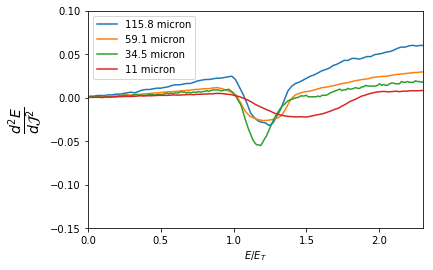

In [406]:
width = []
Et = []
j = 0
for i in clean_slist:
    dat, nam = samp.get_dat(i)
    geo = measurements[i]
    b = samp.b(geo)
    l = samp.bl(geo)
    w = samp.bw(geo)
    
    r = tk.resistivity(dat['R'], np.sqrt(2) * dat['IA'], b)
    e = tk.E_field(dat['IOff'], np.sqrt(2)*dat['IA'], dat['R'], l)
    r = tk.resistivity(dat['R'], np.sqrt(2) * dat['IA'], b)
    e = tk.E_field(dat['IOff'], np.sqrt(2)*dat['IA'], dat['R'], l) 
    ee, rr = derivative(e, r)
    rr = smooth(rr, 10)
    eee, rrr = derivative(ee, rr)
    std = np.std(rrr)
    et = np.min(eee[rrr < -std])
    
    if (j%4 == 1):
        plt.plot(ee/et, rr, '-', label = str(w) + " micron")
    j = j + 1
plt.legend()
plt.xlim(0,2.3)
plt.ylim(-.15, 0.1)
plt.xlabel(r'$E/E_T$')
plt.ylabel(r'$\frac{d^2 E}{d \mathcal{J}^2}$', fontsize = 20)

### 3) d^3 E / d^3 J

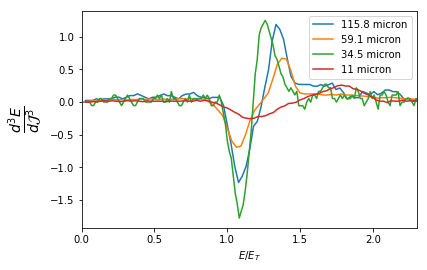

In [436]:
width = []
Et = []
j = 0
for i in clean_slist:
    dat, nam = samp.get_dat(i)
    geo = measurements[i]
    b = samp.b(geo)
    l = samp.bl(geo)
    w = samp.bw(geo)
    
    r = tk.resistivity(dat['R'], np.sqrt(2) * dat['IA'], b)
    e = tk.E_field(dat['IOff'], np.sqrt(2)*dat['IA'], dat['R'], l)
    r = tk.resistivity(dat['R'], np.sqrt(2) * dat['IA'], b)
    e = tk.E_field(dat['IOff'], np.sqrt(2)*dat['IA'], dat['R'], l) 
    ee, rr = derivative(e, r)
    rr = smooth(rr, 10)
    eee, rrr = derivative(ee, rr)
    std = np.std(rrr)
    et = np.min(eee[rrr < -std])
    
    if (j%4 == 1):
        rrr = smooth(rrr, 4)
        plt.plot(eee/et, rrr, '-', label = str(w) + " micron")
    j = j + 1
plt.legend()
plt.xlim(0,2.3)
# plt.ylim(-.15, 0.1)
plt.xlabel(r'$E/E_T$')
plt.ylabel(r'$\frac{d^3 E}{d \mathcal{J}^3}$', fontsize = 20)

# ROUGH: Defining 'width' of sliding transition

Idea: look at d^3E/dJ^3... lower value is where it is below one std, upper value is where it is above one std

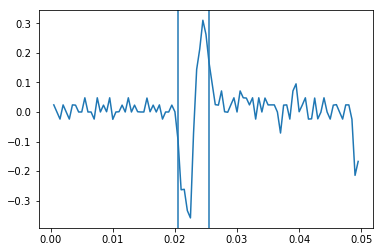

In [437]:
j = clean_slist[1]
dat, nam = samp.get_dat(j)
x = dat['IOff']
y = dat['R']
xx, yy = derivative(x,y)
yy = smooth(yy, 5)
xxx, yyy = derivative(xx, yy)
std = np.std(yyy)
avg = np.mean(yyy)
et = np.min(xxx[yyy - avg < -std])
em = np.max(xxx[yyy - avg > std])
plt.plot(xxx,yyy)
plt.axvline(et)
plt.axvline(em)

C:\Users\Scott Reid\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


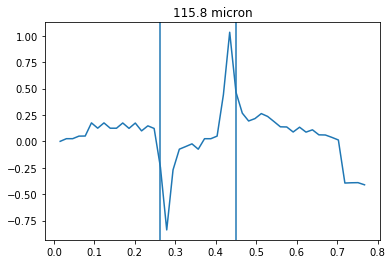

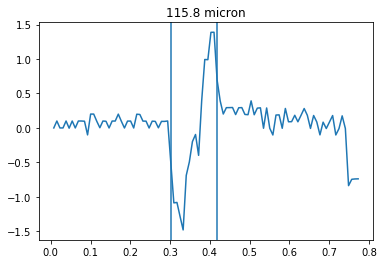

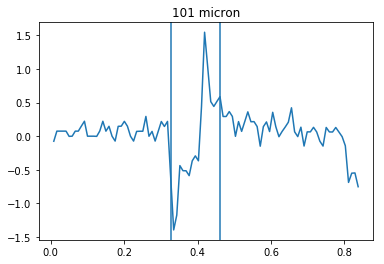

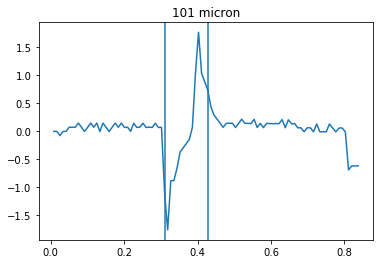

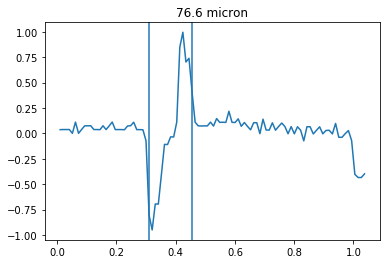

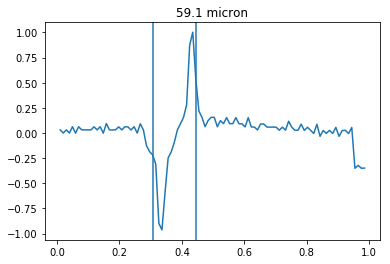

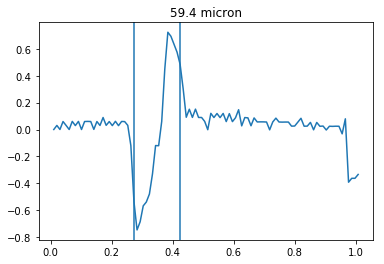

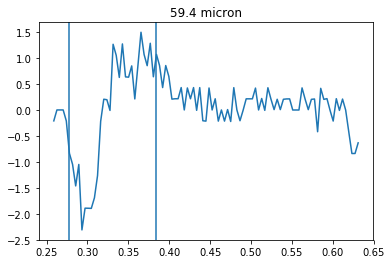

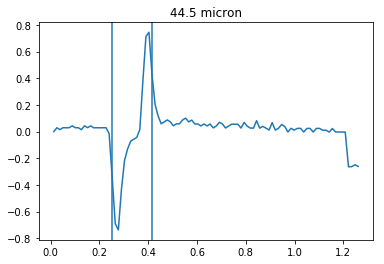

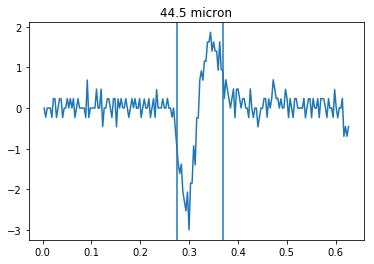

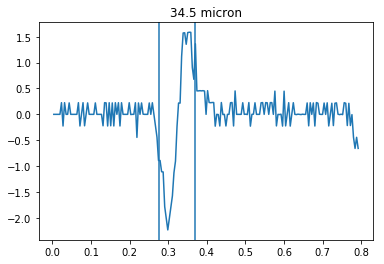

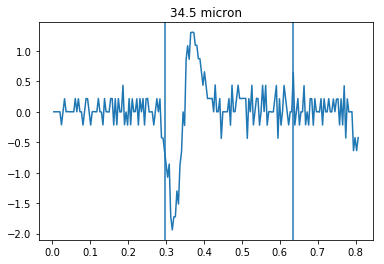

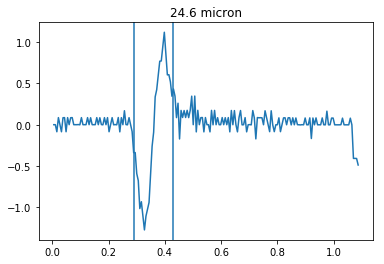

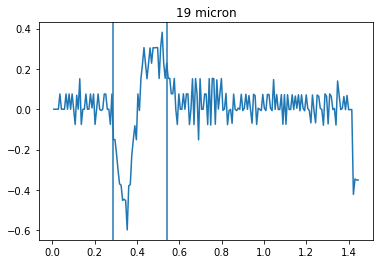

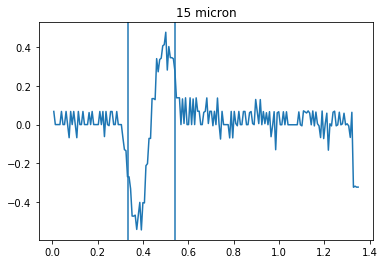

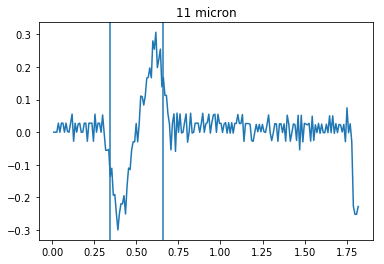

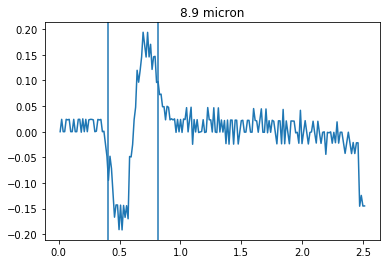

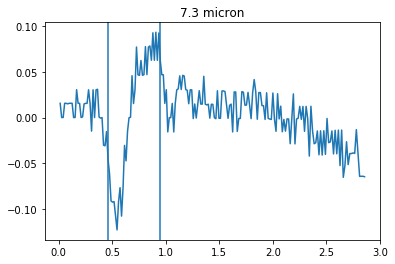

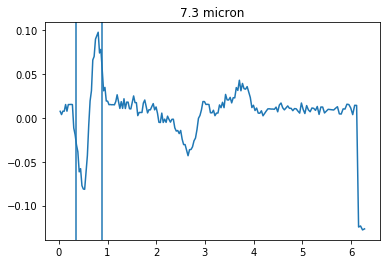

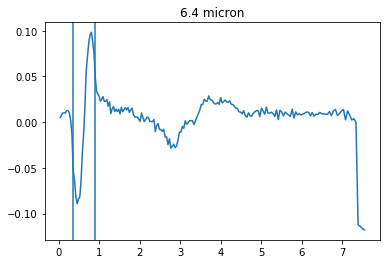

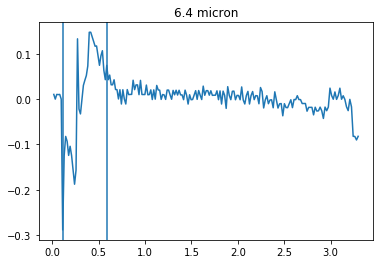

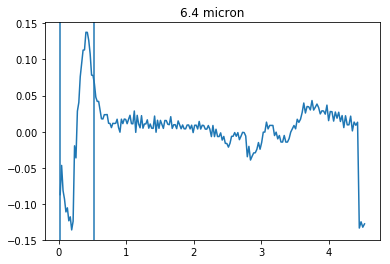

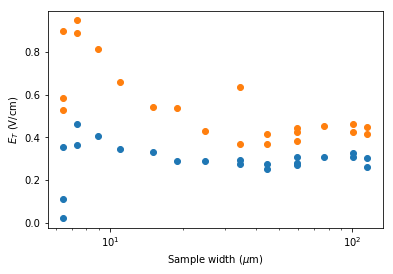

In [450]:
width = []
Et = []
Em = []
for i in sliding_list:
    dat, nam = samp.get_dat(i)
    geo = measurements[i]
    b = samp.b(geo)
    l = samp.bl(geo)
    w = samp.bw(geo)
    
    r = tk.resistivity(dat['R'], np.sqrt(2) * dat['IA'], b)
    e = tk.E_field(dat['IOff'], np.sqrt(2)*dat['IA'], dat['R'], l) 
    ee, rr = derivative(e, r)
    rr = smooth(rr, 10)
    eee, rrr = derivative(ee, rr)
    std = np.std(rrr)
    avg = np.mean(rrr)
    et = np.min(eee[rrr - avg < -std])
    if (len(eee[rrr - avg > 1.3*std]) > 0):
        em = np.max(eee[rrr - avg > 1.3*std])

        plt.figure()
        plt.plot(eee,rrr)
        plt.axvline(et)
        plt.axvline(em)
        plt.title(str(w) + ' micron')

        width.append(w)
        Et.append(et)
        Em.append(em)
plt.figure()
plt.plot(width,Et, 'o')
plt.plot(width,Em, 'o')
plt.xlabel(r'Sample width ($\mu$m)')
plt.ylabel('$E_T$ (V/cm)')
plt.xscale('log')

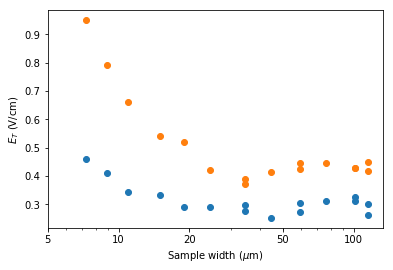

In [452]:
width = []
Et = []
Em = []
for i in clean_slist:
    dat, nam = samp.get_dat(i)
    geo = measurements[i]
    b = samp.b(geo)
    l = samp.bl(geo)
    w = samp.bw(geo)
    
    r = tk.resistivity(dat['R'], np.sqrt(2) * dat['IA'], b)
    e = tk.E_field(dat['IOff'], np.sqrt(2)*dat['IA'], dat['R'], l) 
    ee, rr = derivative(e, r)
    rr = smooth(rr, 10)
    eee, rrr = derivative(ee, rr)
    std = np.std(rrr)
    avg = np.mean(rrr)
    et = np.min(eee[rrr - avg < -std])
    if (len(eee[rrr - avg > 1.5*std]) > 0):
        em = np.max(eee[rrr - avg > 1.5*std])

#         plt.figure()
#         plt.plot(eee,rrr)
#         plt.axvline(et)
#         plt.axvline(em)
#         plt.title(str(w) + ' micron')

        width.append(w)
        Et.append(et)
        Em.append(em)
plt.figure()
plt.plot(width,Et, 'o')
plt.plot(width,Em, 'o')
plt.xlabel(r'Sample width ($\mu$m)')
plt.ylabel('$E_T$ (V/cm)')
plt.xscale('log')
plt.xticks([5, 10, 20, 50, 100], [5, 10, 20, 50, 100])

W = np.array(width)
ET = np.array(Et)
EM = np.array(Em)

([<matplotlib.axis.XTick at 0x1aa81344828>,
 <a list of 5 Text xticklabel objects>)

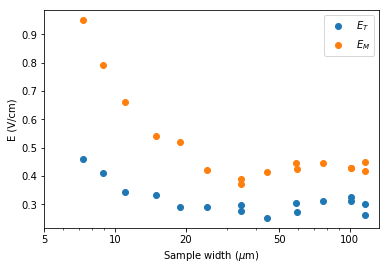

In [453]:
plt.plot(W, ET, 'o', label = r'$E_T$')
plt.plot(W, EM, 'o', label = r'$E_M$')
plt.legend()
plt.xlabel(r'Sample width ($\mu$m)')
plt.ylabel('E (V/cm)')
plt.xscale('log')
plt.xticks([5, 10, 20, 50, 100], [5, 10, 20, 50, 100])

([<matplotlib.axis.XTick at 0x1aa810d2e10>,
 <a list of 5 Text xticklabel objects>)

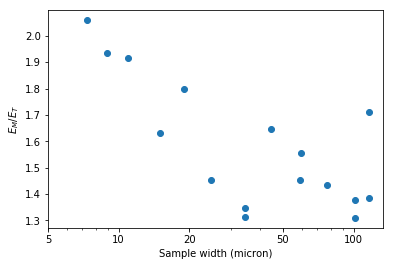

In [454]:
plt.plot(W, EM/ET, 'o')
plt.xlabel('Sample width (micron)')
plt.ylabel(r'$E_M/E_T$')
plt.xscale('log')
plt.xticks([5, 10, 20, 50, 100], [5, 10, 20, 50, 100])

# Fitting krive-rozhavsky model to d^3E/dJ^3 data

### d^3E/dJ^3 through implicit differentiation

In [515]:
def kr_djde(e, et, eo, sig_c, sig_o):
    return sig_o + (e > et) * sig_c * (eo + e - et)/(e - et) * np.exp(-eo/(e-et))

In [516]:
def kr_dedj(e, et, eo, sig_c, sig_o):
    return 1/kr_djde(e, et, eo, sig_c, sig_o)

In [534]:
def kr_d2jde2(e, et, eo, sig_c, sig_o):
    return 0 + (e > et) * sig_c * np.exp(-eo/(e - et)) / (e-et)**3

In [542]:
def kr_d2edj2(e, et, eo, sig_c, sig_o):
    return -kr_d2jde2(e, et, eo, sig_c, sig_o)/(kr_djde(e, et, eo, sig_c, sig_o)**3)

In [637]:
def kr_d3jde3(e, et, eo, sig_c, sig_o):
    return 0 - (e>et) * sig_c * eo**2 * np.exp(-eo/(e-et)) * (eo + 3*et - 3*e)/(et - e)**5

In [638]:
def kr_d3edj3(e, et, eo, sig_c, sig_o):
    return -kr_d3jde3(e, et, eo, sig_c, sig_o)/(kr_djde(e, et, eo, sig_c, sig_o))**4 + 3 * kr_d2jde2(e, et, eo, sig_c, sig_o)/(kr_djde(e, et, eo, sig_c, sig_o))**5

C:\Users\Scott Reid\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
C:\Users\Scott Reid\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
C:\Users\Scott Reid\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app
C:\Users\Scott Reid\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


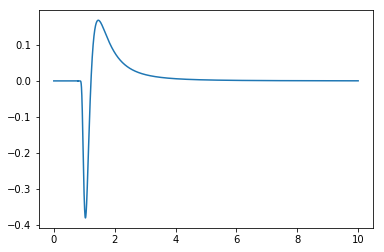

In [642]:
x = np.arange(0, 10, 0.001)
plt.plot(x, kr_d3edj3(x, 0.8, 1.5, .1, 1))

# Once Again, with more care for units!

In [981]:
def kr_djde(e, et, eo, sig_c, sig_o):
    return sig_o + (e > et) * sig_c * (eo + e - et)/(e - et) * np.exp(-eo/(e-et))

In [1008]:
def kr_d2jde2(e, et, eo, sig_c):
    return 0 + (e > et) * sig_c * eo**2 * np.exp(-eo/(e - et)) / (e-et)**3

In [1009]:
def kr_d3jde3(e, et, eo, sig_c):
    return 0 - (e>et) * sig_c * eo**2 * np.exp(-eo/(e-et)) * (eo + 3*et - 3*e)/(et - e)**5

In [1265]:
def analyze_slide(i, show_fig = True):
    j = clean_slist[i]
    dat, nam = samp.get_dat(j)
    geo = measurements[j]
    b = samp.b(geo)
    l = samp.bl(geo)
    w = samp.bw(geo)
    z = samp.bz(geo)
    
    r = tk.resistivity(dat['R'], np.sqrt(2) * dat['IA'], b) #microOhm m, differential resisitivity dE/dJ
    djde = 1/r * 1e6 #S/m, differential conductivity dJ/dE
    e = tk.E_field(dat['IOff'], np.sqrt(2)*dat['IA'], dat['R'], l)*1e2 #V/m, electric field
    djde = djde[e < 180]
    e = e[e < 180]
    
    e2, d2jde2 = derivative(e, djde)
    d2jde2s = smooth(d2jde2, 3)
    es, d3jde3s = derivative(e2, d2jde2s)
    e, d3jde3 = derivative(e2, d2jde2)
    
    sig_o = djde[0]
    std = np.std(d3jde3)
    et = np.min(es[d3jde3s > std])
    def krlimited(e, eo, sig_c, alpha):
        return kr_d2jde2(e, et, eo, sig_c) + alpha * e
    popt, pcov = curve_fit(krlimited, e2, d2jde2, check_finite = True, p0 = [15, 4e4, -0.1])
    
    eo = popt[0]
    sig_c = popt[1]
    alpha = popt[2]
    
    if(show_fig):
        plt.figure()
        plt.plot(e2, d2jde2, 'k:.')
        plt.xlabel('E (V/m)')
        plt.ylabel(r'$d^2\mathcal{J}/dE^2$ (S/V)')
        plt.title(str(w) + ' micron bridge')
        x = np.arange(0, np.max(e), 0.1)
        plt.plot(x, krlimited(x, *popt))
    
    return w, et, eo, sig_c, sig_o, alpha

C:\Users\Scott Reid\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
C:\Users\Scott Reid\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


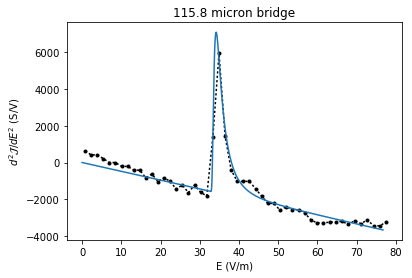

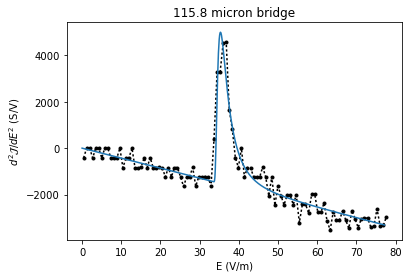

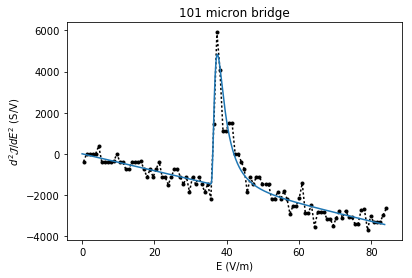

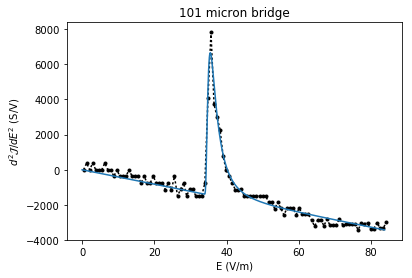

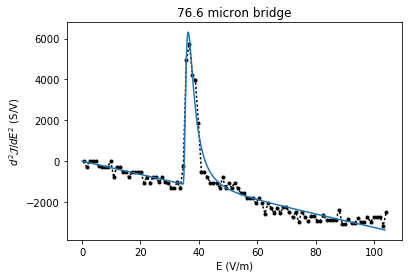

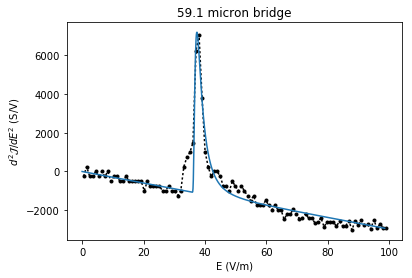

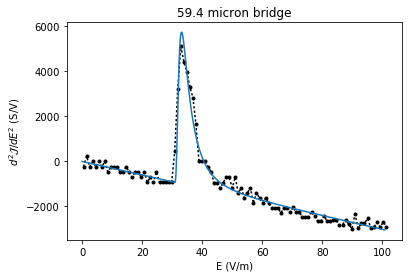

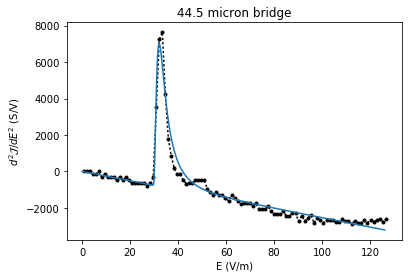

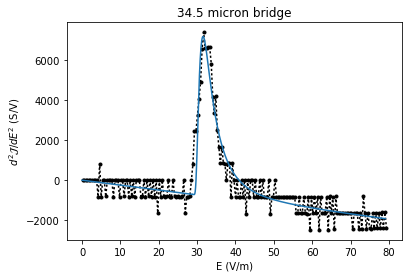

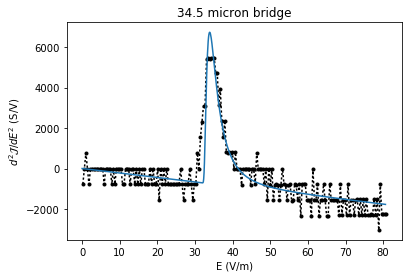

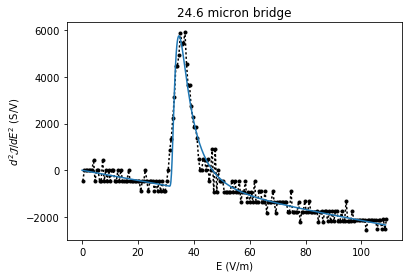

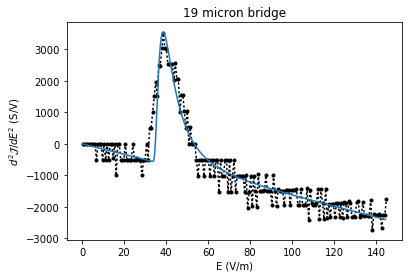

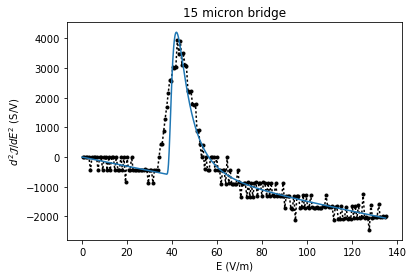

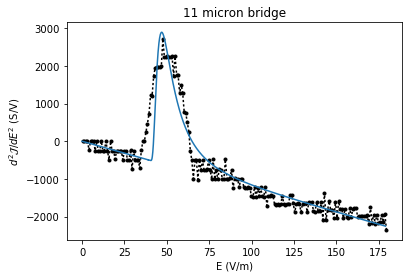

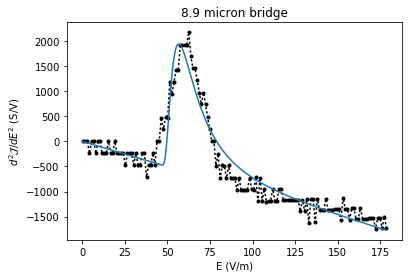

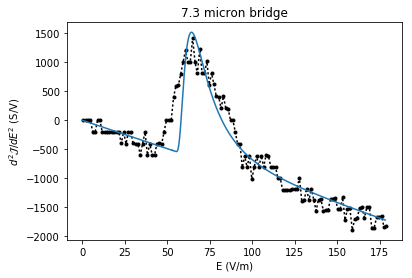

In [1266]:
W = []
Et = []
Eo = []
Sig_c = []
Sig_o = []
Alpha = []
for i in range(len(clean_slist)):
    w, et, eo, sig_c, sig_o, alpha = analyze_slide(i, show_fig = True)
    W.append(w)
    Et.append(et)
    Eo.append(eo)
    Sig_c.append(sig_c)
    Sig_o.append(sig_o)
    Alpha.append(alpha)
W = np.array(W)
Et = np.array(Et)
Eo = np.array(Eo)
Sig_c = np.array(Sig_c)
Sig_o = np.array(Sig_o)
Alpha = np.array(Alpha)

C:\Users\Scott Reid\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
C:\Users\Scott Reid\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app
C:\Users\Scott Reid\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
C:\Users\Scott Reid\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


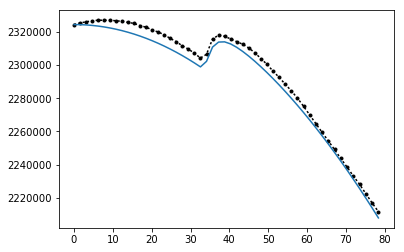

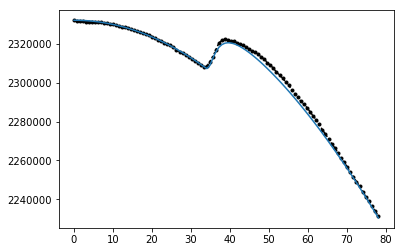

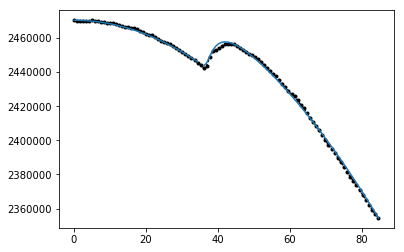

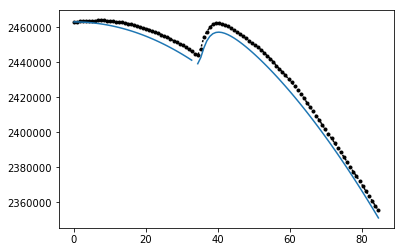

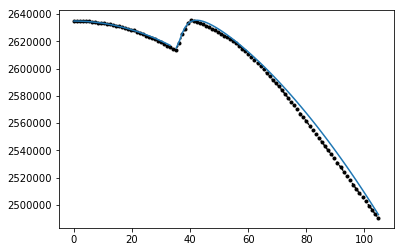

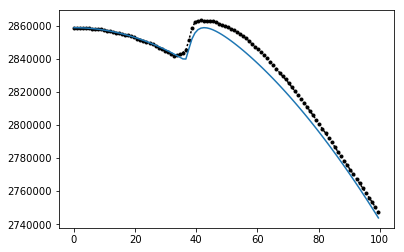

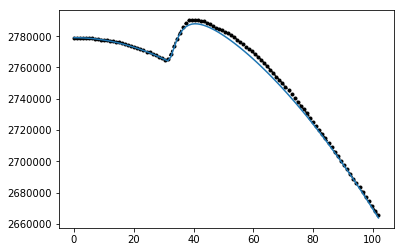

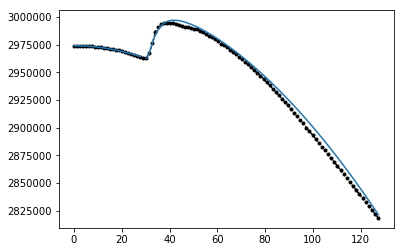

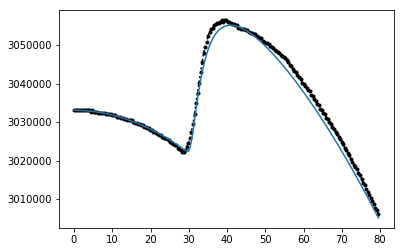

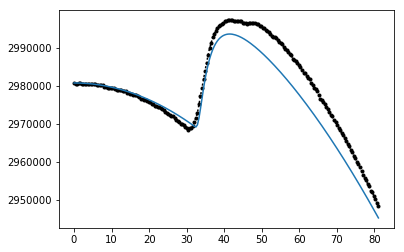

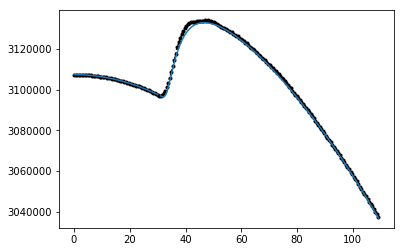

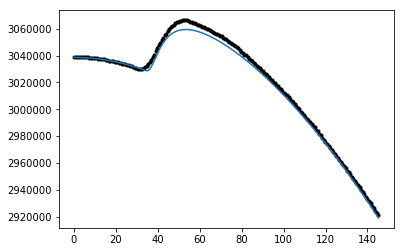

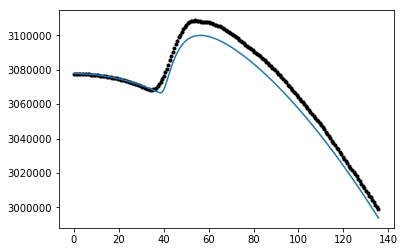

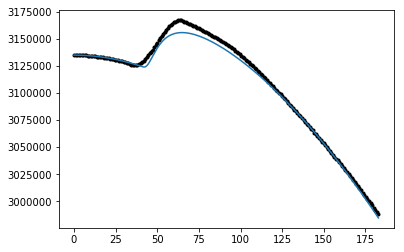

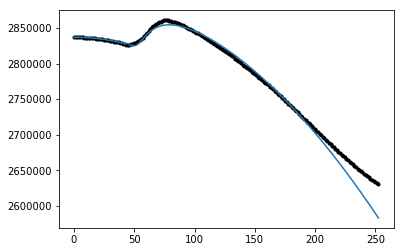

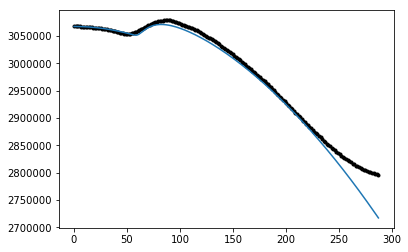

In [1267]:
for i in range(len(clean_slist)):
    w, et, eo, sig_c, sig_o, alpha = analyze_slide(i, show_fig = False)
    j = clean_slist[i]
    dat, nam = samp.get_dat(j)
    geo = measurements[j]
    b = samp.b(geo)
    l = samp.bl(geo)
    w = samp.bw(geo)
    z = samp.bz(geo)
    
    r = tk.resistivity(dat['R'], np.sqrt(2) * dat['IA'], b) #microOhm m, differential resisitivity dE/dJ
    djde = 1/r * 1e6 #S/m, differential conductivity dJ/dE
    e = tk.E_field(dat['IOff'], np.sqrt(2)*dat['IA'], dat['R'], l)*1e2 #V/m, electric field
    
    def krlim(e):
        return kr_djde(e, et, eo, sig_c, sig_o) + alpha/2 * e * e
    plt.figure()
    plt.plot(e, djde, 'k:.')
    plt.plot(e, krlim(e))

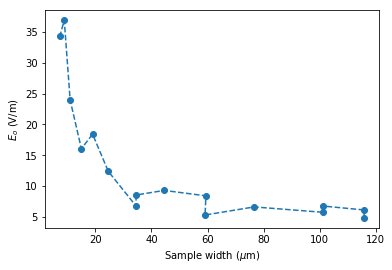

In [1268]:
plt.plot(W, Eo, 'o--')
plt.xlabel(r'Sample width ($\mu$m)')
plt.ylabel(r'$E_o$ (V/m)')

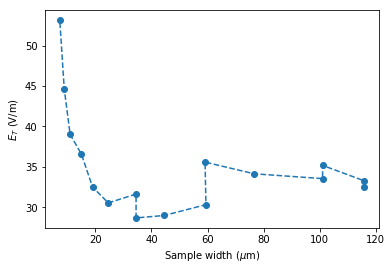

In [1269]:
plt.plot(W, Et, 'o--')
plt.xlabel(r'Sample width ($\mu$m)')
plt.ylabel(r'$E_T$ (V/m)')

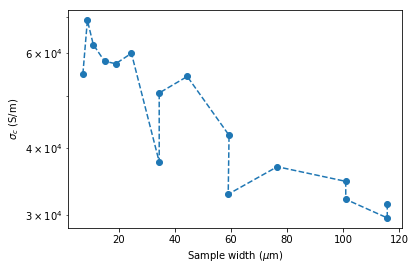

In [1270]:
plt.plot(W, Sig_c, 'o--')
plt.xlabel(r'Sample width ($\mu$m)')
plt.ylabel(r'$\sigma_c$ (S/m)')
plt.yscale('log')

(2000000.0, 4000000.0)

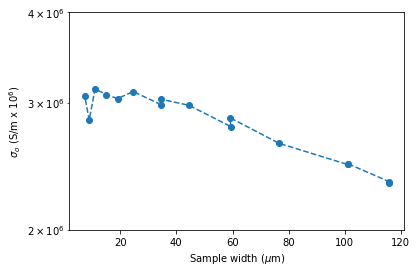

In [1271]:
plt.plot(W, Sig_o, 'o--')
plt.xlabel(r'Sample width ($\mu$m)')
plt.ylabel(r'$\sigma_o$ (S/m x $10^6$)')
plt.yscale('log')
plt.ylim(2e6, 4e6)

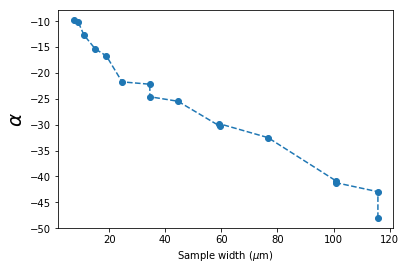

In [1272]:
plt.plot(W, Alpha, 'o--')
plt.xlabel(r'Sample width ($\mu$m)')
plt.ylabel(r'$\alpha$', fontsize = 20)

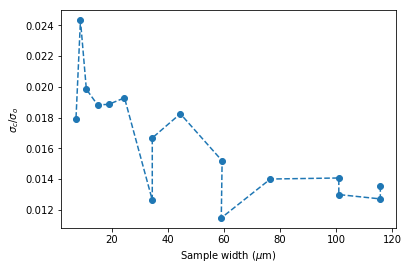

In [1273]:
plt.plot(W, Sig_c/Sig_o, 'o--')
plt.xlabel(r'Sample width ($\mu$m)')
plt.ylabel(r'$\sigma_c/\sigma_o$')
# plt.yscale('log')
# plt.xscale('log')

# Widening Bridge Look-Ahead

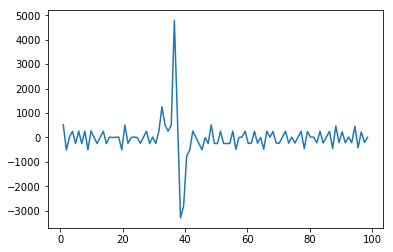

In [1057]:
dat, nam = samp.get_dat(21)
geo = measurements[21]
b = samp.b(geo)
l = samp.bl(geo)
w = samp.bw(geo)
z = samp.bz(geo)

r = tk.resistivity(dat['R'], np.sqrt(2) * dat['IA'], b) #microOhm m, differential resisitivity dE/dJ
djdew = 1/r * 1e6 #S/m, differential conductivity dJ/dE
ew = tk.E_field(dat['IOff'], np.sqrt(2)*dat['IA'], dat['R'], l)*1e2 #V/m, electric field
e2w, d2jde2w = derivative(ew, djdew)
e3w, d3jde3w = derivative(e2w, d2jde2w)

plt.plot(e3w, d3jde3w)

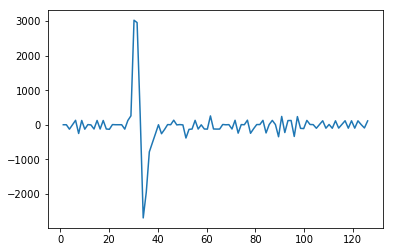

In [1058]:
dat, nam = samp.get_dat(24)
geo = measurements[24]
b = samp.b(geo)
l = samp.bl(geo)
w = samp.bw(geo)
z = samp.bz(geo)

r = tk.resistivity(dat['R'], np.sqrt(2) * dat['IA'], b) #microOhm m, differential resisitivity dE/dJ
djde = 1/r * 1e6 #S/m, differential conductivity dJ/dE
e = tk.E_field(dat['IOff'], np.sqrt(2)*dat['IA'], dat['R'], l)*1e2 #V/m, electric field
e2, d2jde2 = derivative(e, djde)
e3, d3jde3 = derivative(e2, d2jde2)

plt.plot(e3, d3jde3)

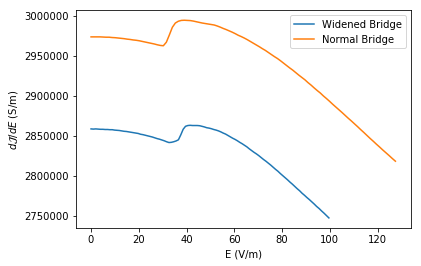

In [1063]:
plt.figure()
plt.plot(ew, djdew, label = 'Widened Bridge')
plt.plot(e, djde, label = 'Normal Bridge')
plt.legend()
plt.xlabel('E (V/m)')
plt.ylabel(r'$d\mathcal{J}/dE$ (S/m)')

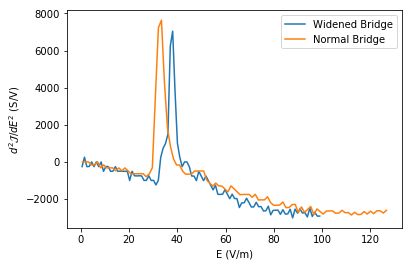

In [1065]:
plt.figure()
plt.plot(e2w, d2jde2w, label = 'Widened Bridge')
plt.plot(e2, d2jde2, label = 'Normal Bridge')
plt.legend()
plt.xlabel('E (V/m)')
plt.ylabel(r'$d^2\mathcal{J}/dE^2$ (S/V)')

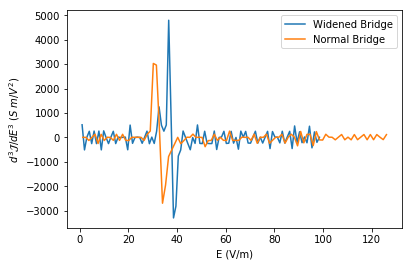

In [1067]:
plt.figure()
plt.plot(e3w, d3jde3w, label = 'Widened Bridge')
plt.plot(e3, d3jde3, label = 'Normal Bridge')
plt.legend()
plt.xlabel('E (V/m)')
plt.ylabel(r'$d^3\mathcal{J}/dE^3$ ($S \; m/V^2$)')

# Second Threshold Field?

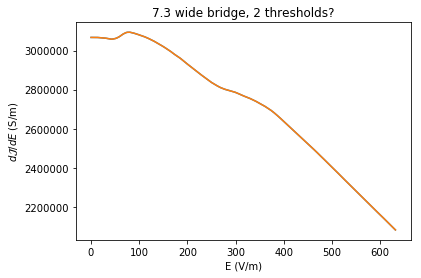

In [1083]:
dat, nam = samp.get_dat(37)
geo = measurements[37]
b = samp.b(geo)
l = samp.bl(geo)
w = samp.bw(geo)
z = samp.bz(geo)

r = tk.resistivity(dat['R'], np.sqrt(2) * dat['IA'], b) #microOhm m, differential resisitivity dE/dJ
djde = 1/r * 1e6 #S/m, differential conductivity dJ/dE
e = tk.E_field(dat['IOff'], np.sqrt(2)*dat['IA'], dat['R'], l)*1e2 #V/m, electric field
e2, d2jde2 = derivative(e, djde)
e3, d3jde3 = derivative(e2, d2jde2)

plt.plot(e, djde)

r = tk.resistivity(dat['R'], np.sqrt(2) * dat['IA'], b) #microOhm m, differential resisitivity dE/dJ
djde = 1/r * 1e6 #S/m, differential conductivity dJ/dE
e = tk.E_field(dat['IOff'], np.sqrt(2)*dat['IA'], dat['R'], l)*1e2 #V/m, electric field
e2, d2jde2 = derivative(e, djde)
e3, d3jde3 = derivative(e2, d2jde2)

plt.xlabel('E (V/m)')
plt.ylabel(r'$d\mathcal{J}/dE$ (S/m)')
plt.title(str(w) + ' wide bridge, 2 thresholds?')

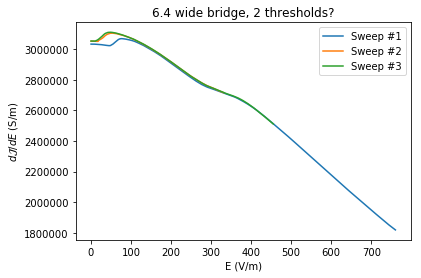

In [1096]:
dat, nam = samp.get_dat(38)
geo = measurements[38]
b = samp.b(geo)
l = samp.bl(geo)
w = samp.bw(geo)
z = samp.bz(geo)

r = tk.resistivity(dat['R'], np.sqrt(2) * dat['IA'], b) #microOhm m, differential resisitivity dE/dJ
djde = 1/r * 1e6 #S/m, differential conductivity dJ/dE
e = tk.E_field(dat['IOff'], np.sqrt(2)*dat['IA'], dat['R'], l)*1e2 #V/m, electric field
e2, d2jde2 = derivative(e, djde)
e3, d3jde3 = derivative(e2, d2jde2)

plt.plot(e, djde, label = 'Sweep #1')

dat, nam = samp.get_dat(39)
geo = measurements[39]
b = samp.b(geo)
l = samp.bl(geo)
w = samp.bw(geo)
z = samp.bz(geo)

r = tk.resistivity(dat['R'], np.sqrt(2) * dat['IA'], b) #microOhm m, differential resisitivity dE/dJ
djde = 1/r * 1e6 #S/m, differential conductivity dJ/dE
e = tk.E_field(dat['IOff'], np.sqrt(2)*dat['IA'], dat['R'], l)*1e2 #V/m, electric field
e2, d2jde2 = derivative(e, djde)
e3, d3jde3 = derivative(e2, d2jde2)

plt.plot(e, djde, label = 'Sweep #2')

dat, nam = samp.get_dat(40)
geo = measurements[40]
b = samp.b(geo)
l = samp.bl(geo)
w = samp.bw(geo)
z = samp.bz(geo)

r = tk.resistivity(dat['R'], np.sqrt(2) * dat['IA'], b) #microOhm m, differential resisitivity dE/dJ
djde = 1/r * 1e6 #S/m, differential conductivity dJ/dE
e = tk.E_field(dat['IOff'], np.sqrt(2)*dat['IA'], dat['R'], l)*1e2 #V/m, electric field
e2, d2jde2 = derivative(e, djde)
e3, d3jde3 = derivative(e2, d2jde2)

plt.plot(e, djde, label = 'Sweep #3')


plt.xlabel('E (V/m)')
plt.ylabel(r'$d\mathcal{J}/dE$ (S/m)')
plt.legend()
plt.title(str(w) + ' wide bridge, 2 thresholds?')